# Name : Tanmay C Rahate

# GRIP @ The Spark Foundation

# Task 1 : Prediction using Supervised ML
                           (Level - Beginner)

Task Description: 

- Predict the percentage of an student based on the no. of study hours.

- This is simple linear regression task as it involve just 2 variables.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# dataset
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataframe = pd.read_csv(url)
print("Data imported successfullly")
dataframe.head()

Data imported successfullly


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
dataframe.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [23]:
dataframe.shape

(25, 2)

# Structure of DataFrame

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Describing Data

In [25]:
dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
dataframe.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plottind Data

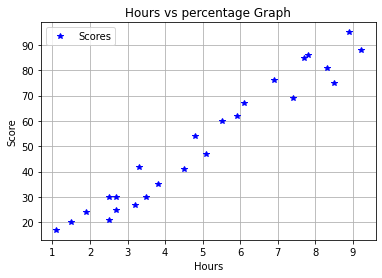

In [27]:
dataframe.plot(x='Hours', y='Scores', style='*', color='blue')
plt.title('Hours vs percentage Graph')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.grid()
plt.show()

## Preparing data for training, testing and spliting 

In [28]:
x = (dataframe['Hours'].values).reshape(-1,1)
y = (dataframe['Scores'].values)

## Spliting data using sklearn.model_selection

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [30]:
#print('x train')
#print(x_train)

#print('y train')
#print(y_train)

## Training

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

print("Training Model complete")

Training Model complete


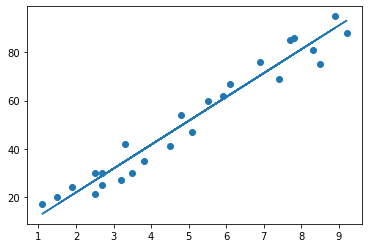

In [32]:
# REGRESSION line formula 
# Line = ((slope of line) * explanatory variable) + intercept
line = reg.coef_ * x + reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Making Prediction

In [33]:
print(x_test)
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual Vs Predicted data

In [34]:
comp_dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comp_dataframe

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Problem Statement - What will be predicted score if a student studies for 9.25 hrs/day?

In [35]:
hours = 9.25
pred = reg.predict([[hours]])
print("Hours= {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Hours= 9.25
Predicted Score = 93.69173248737538


## Mean Absolute Error

To evaluate the perfomance of algorithm

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
